In [1]:
import beamtime_config_2018
import ROI_Finder_2018
import XRF_dataset_2018

from beamtime_config_2018 import *
from ROI_Finder_2018 import *
from XRF_dataset_2018 import *


2022-03-03 21:45:00.460329: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


## load 2018 XRF data with baseline settings, annotations and artifacts removed

In [2]:
XRF_data = load_XRF_dataset_2018(noise_type = 'none', base_file_path='/data02/AZC/XRF_Data/' )

X=XRF_data['X']
X_bin=XRF_data['X_bin']
X_Cu=XRF_data['X_Cu']
X_Zn=XRF_data['X_Zn']
X_Ca=XRF_data['X_Ca']
X_K=XRF_data['X_K']
X_P=XRF_data['X_P']
X_S=XRF_data['X_S']
X_Fe=XRF_data['X_Fe']
X_Ni=XRF_data['X_Ni']
X_TFY=XRF_data['X_TFY']
principalDf=XRF_data['principalDf']

# get the annotated data so remove if not annotated
secondaryDf=principalDf[principalDf['KO_label'] != 'not_annotated' ]
# remove additional artifacts that do not contain 8 pixels
secondaryDf=secondaryDf[secondaryDf['Pixel_count'] >8]

Total extracted cells, features: (554, 14)
Total extracted cell, cell size: (554, 32, 32)


## view the cells

In [3]:
linethresh_val=0.00001
resolution=DEFAULT_RESOLUTION_CELL

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

def viewer(idx):

    fig = plt.figure(figsize=(10, 20))
    fig.suptitle('cell_img'+ '_' + str(idx))

    ax1 = fig.add_subplot(521)
    ax1.set_title('binary'+ '_' + str(idx))
    im1 = ax1.imshow(X_bin[idx].T, interpolation='none')
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')
    scalebar_master = ScaleBar( SCALE_UNIT_FACTOR*resolution, "m", color='white', length_fraction=0.10, box_alpha=0.10)
    ax1.add_artist(scalebar_master)
    
    

    ax2 = fig.add_subplot(522)
    ax2.set_title('Cu')
    im2 = ax2.imshow(X_Cu[idx].T, interpolation='none', vmax=0.003087)
#     im2 = ax2.imshow(X_Cu[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical');


    ax3 = fig.add_subplot(523)
    ax3.set_title('Zn')
    im3 = ax3.imshow(X_Zn[idx].T, interpolation='none', vmax=0.00318)
#     im3 = ax3.imshow(X_Zn[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im3, cax=cax, orientation='vertical');

    ax4 = fig.add_subplot(524)
    ax4.set_title('Ca')
    im4 = ax4.imshow(X_Ca[idx].T, interpolation='none', vmax=0.00174)
#     im4 = ax4.imshow(X_Ca[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val) )
    divider = make_axes_locatable(ax4)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im4, cax=cax, orientation='vertical');


    ax5 = fig.add_subplot(525)
    ax5.set_title('K')
    im5 = ax5.imshow(X_K[idx].T, interpolation='none',vmax=0.000584)
#     im5 = ax5.imshow(X_K[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax5)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im5, cax=cax, orientation='vertical');

    ax6 = fig.add_subplot(526)
    ax6.set_title('P')
    im6 = ax6.imshow(X_P[idx].T, interpolation='none', vmax=0.000164)
#     im6 = ax6.imshow(X_P[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax6)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im6, cax=cax, orientation='vertical');

    ax7 = fig.add_subplot(527)
    ax7.set_title('S')
    im7 = ax7.imshow(X_S[idx].T, interpolation='none', vmax=0.000122)
#     im7 = ax7.imshow(X_S[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax7)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im7, cax=cax, orientation='vertical');

    ax8 = fig.add_subplot(528)
    ax8.set_title('Ni')
    im8 = ax8.imshow(X_Ni[idx].T, interpolation='none', vmax=0.000093)
#     im8 = ax8.imshow(X_Ni[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax8)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im8, cax=cax, orientation='vertical');

    ax9 = fig.add_subplot(529)
    ax9.set_title('Fe')
    im9 = ax9.imshow(X_Fe[idx].T, interpolation='none', vmax=0.000139)
#     im9 = ax9.imshow(X_Fe[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax9)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im9, cax=cax, orientation='vertical');

    ax10 = fig.add_subplot(5,2,10)
    ax10.set_title('TFY')
    im10 = ax10.imshow(X_TFY[idx].T, interpolation='none', vmax=0.029495)
#     im10 = ax10.imshow(X_TFY[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = 500*linethresh_val))
    divider = make_axes_locatable(ax10)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im10, cax=cax, orientation='vertical');


interactive_plot = interactive(viewer, idx=(0, len(X_bin)-1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=276, description='idx', max=553), Output()), _dom_classes=('widget-inter…

## Construct the feature array after artifact removal

In [4]:
mod_X = np.asarray([
    secondaryDf['area'],secondaryDf['eccentricity'],secondaryDf['equivalent_diameter'],
    secondaryDf['major_axis_length'],secondaryDf['minor_axis_length'],secondaryDf['perimeter'],
    secondaryDf['K'],secondaryDf['P'],secondaryDf['Ni'],secondaryDf['Zn'],secondaryDf['Fe'],
    secondaryDf['Cu'],secondaryDf['BFY']
               ]).T

print('Cells, features', mod_X.shape)

Cells, features (303, 13)


## perform PCA

Cells, PCs (303, 2)
singular_values_: [37.20672331 35.70114671]
explained_variance: [4.58390814 4.22043668]
components: [[ 0.41713232  0.23324134  0.41880975  0.41010617  0.20284951  0.40656977
   0.19166731  0.24718833  0.19105171 -0.08109155  0.23525062 -0.08109155
  -0.13685688]
 [ 0.2027807   0.00247106  0.19915106  0.12219008  0.21760991  0.1894361
  -0.39926773 -0.31204489 -0.03192634  0.41289993 -0.24734344  0.41289993
   0.4013536 ]]


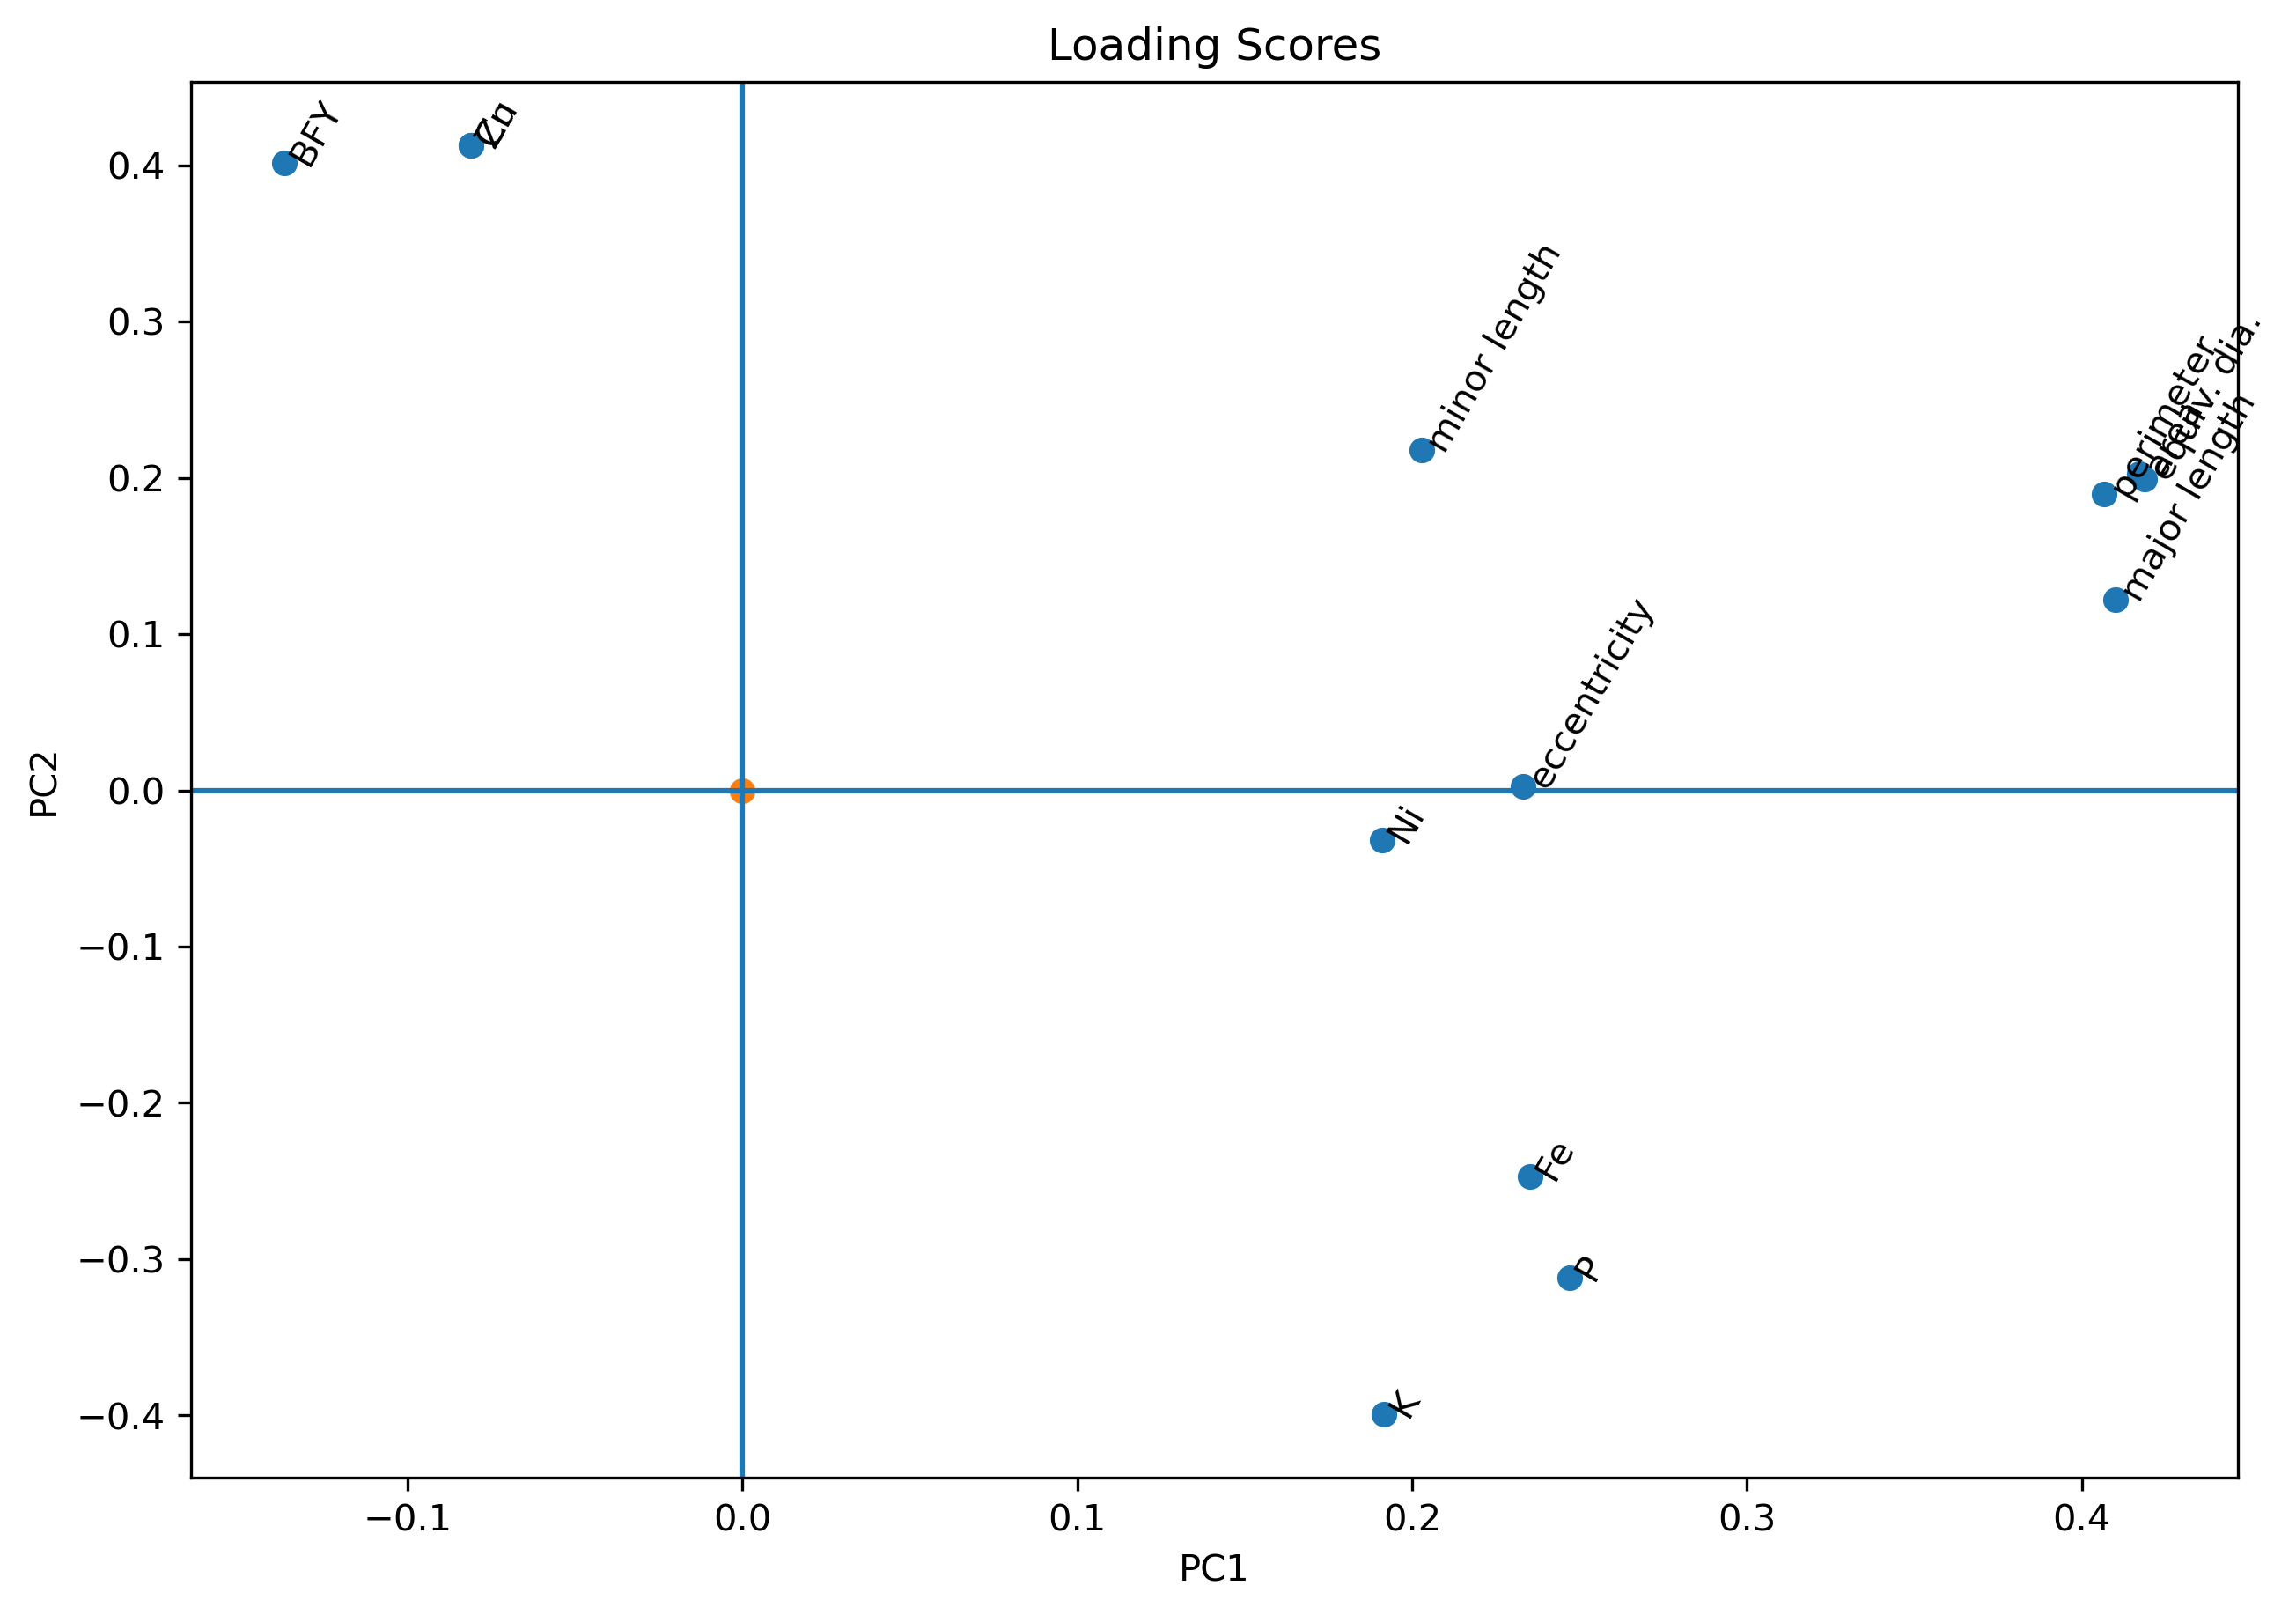

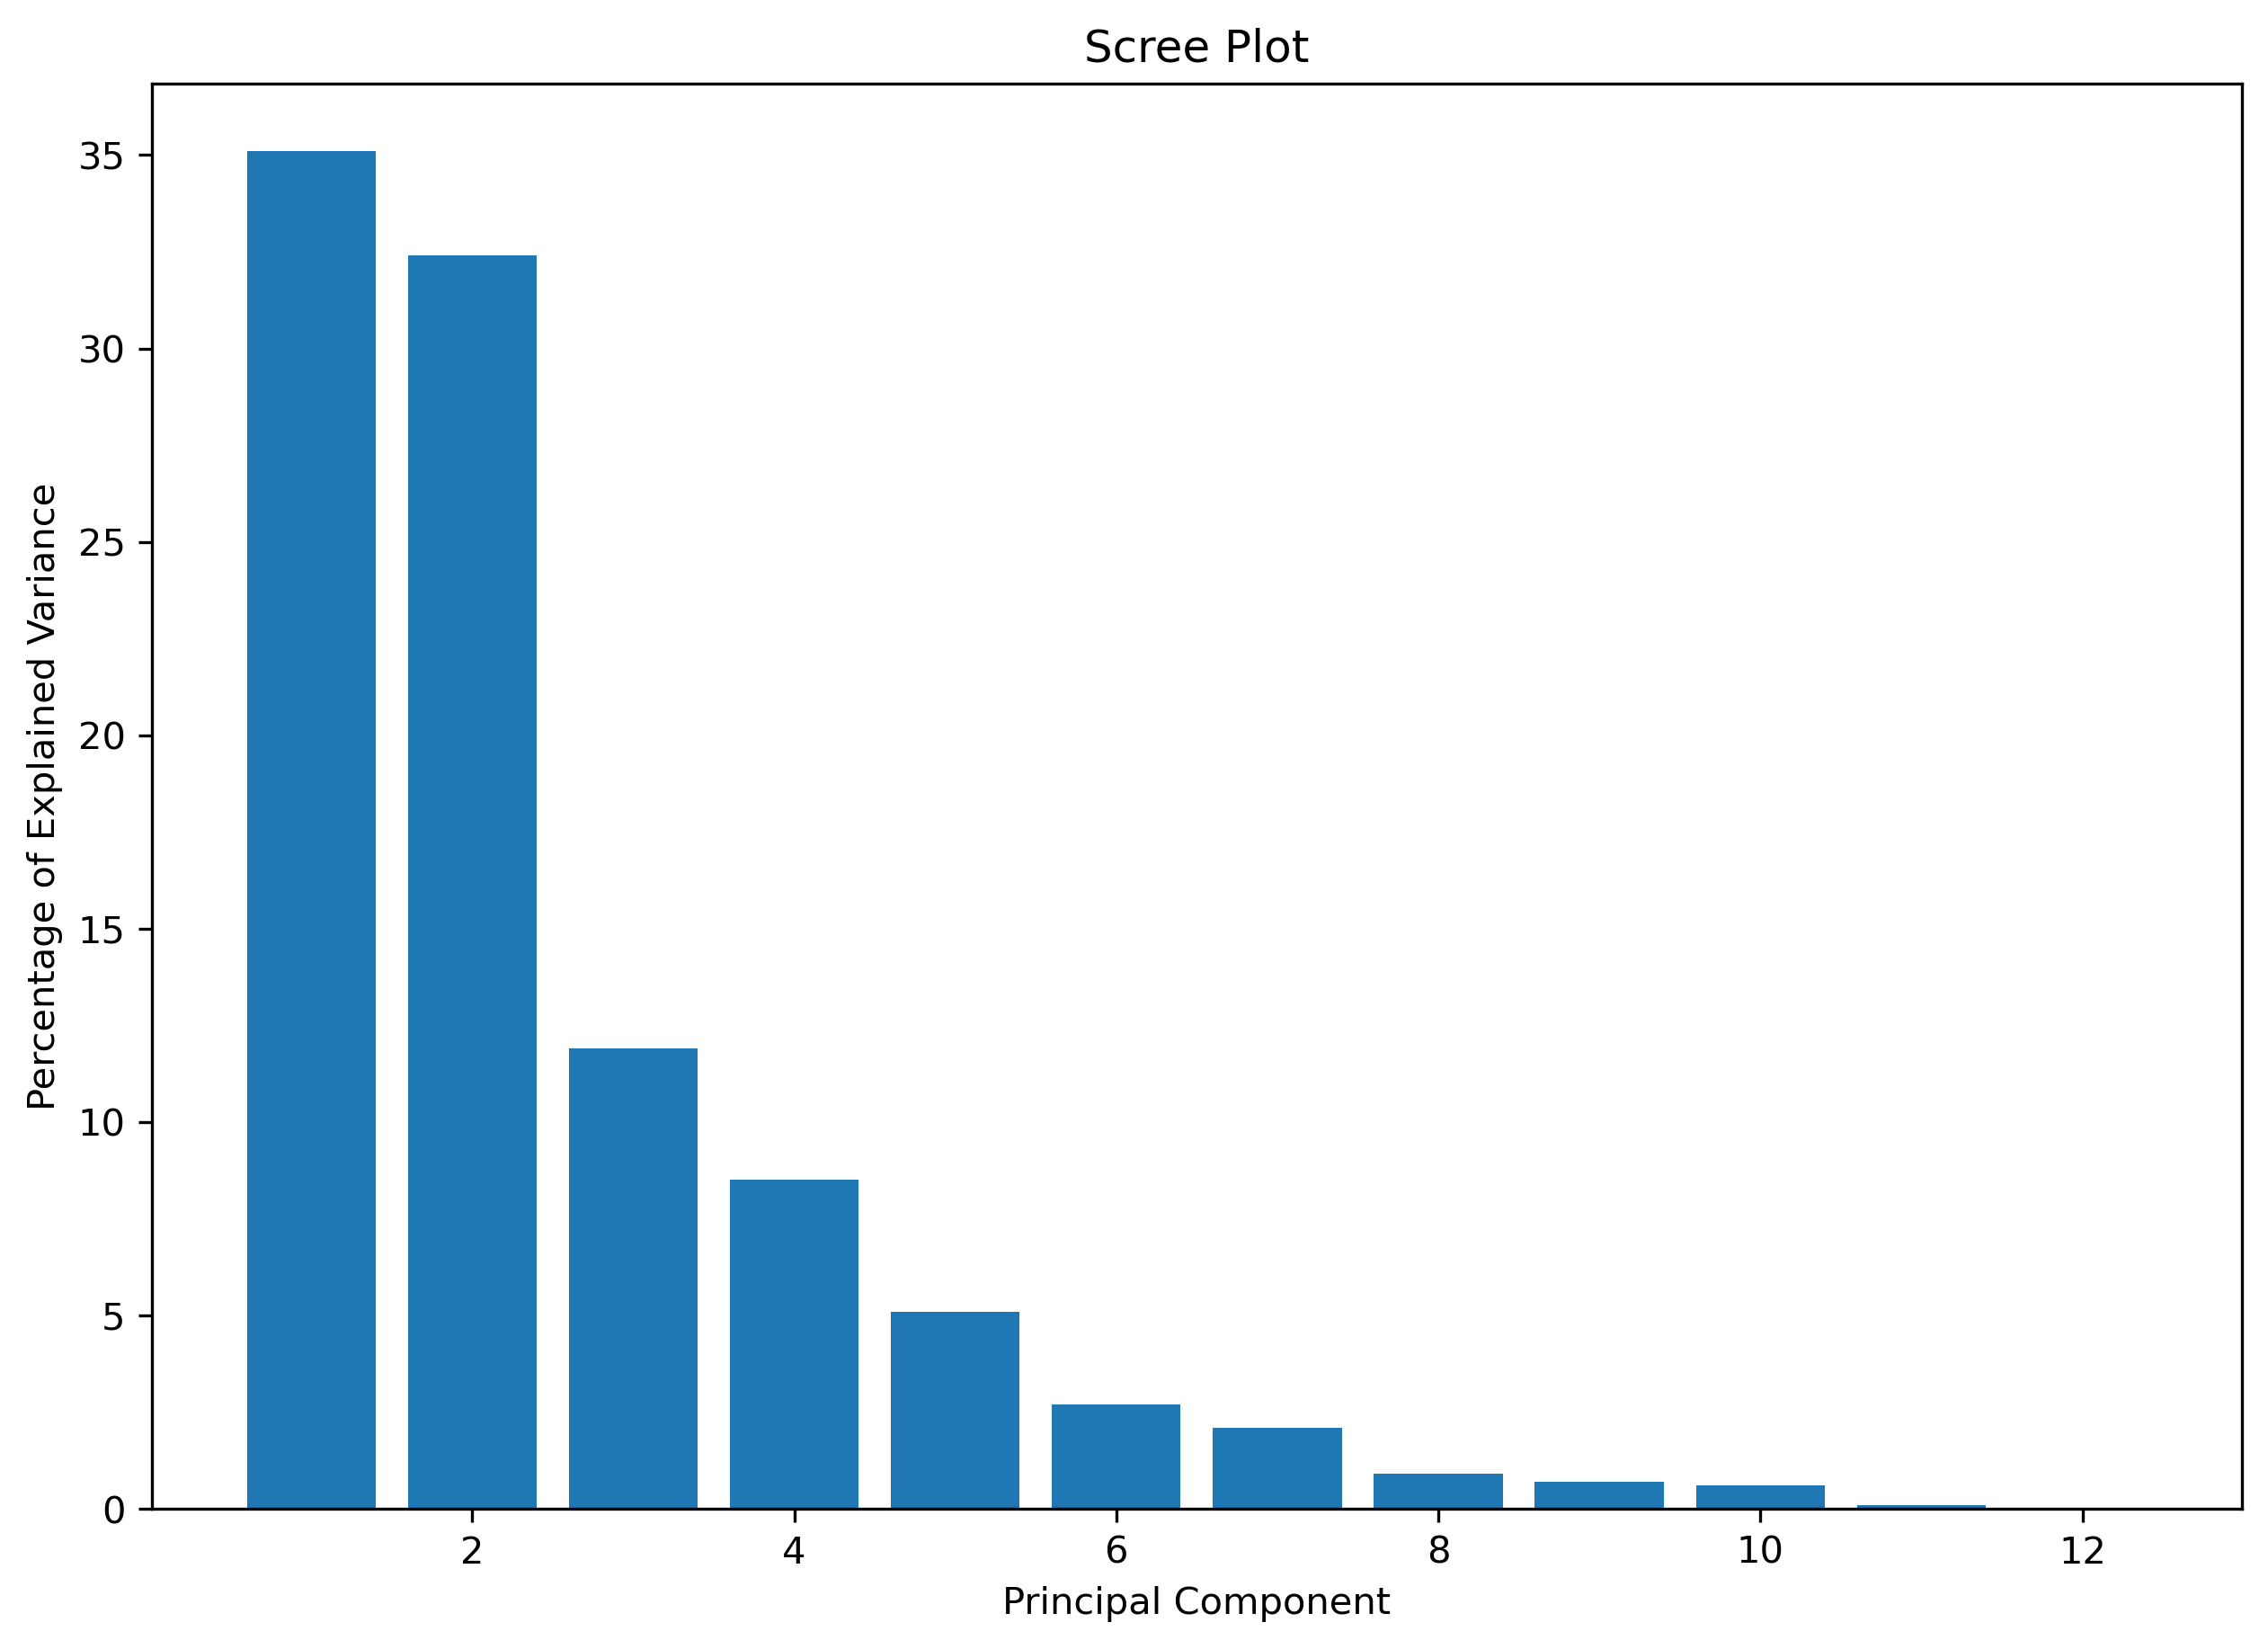

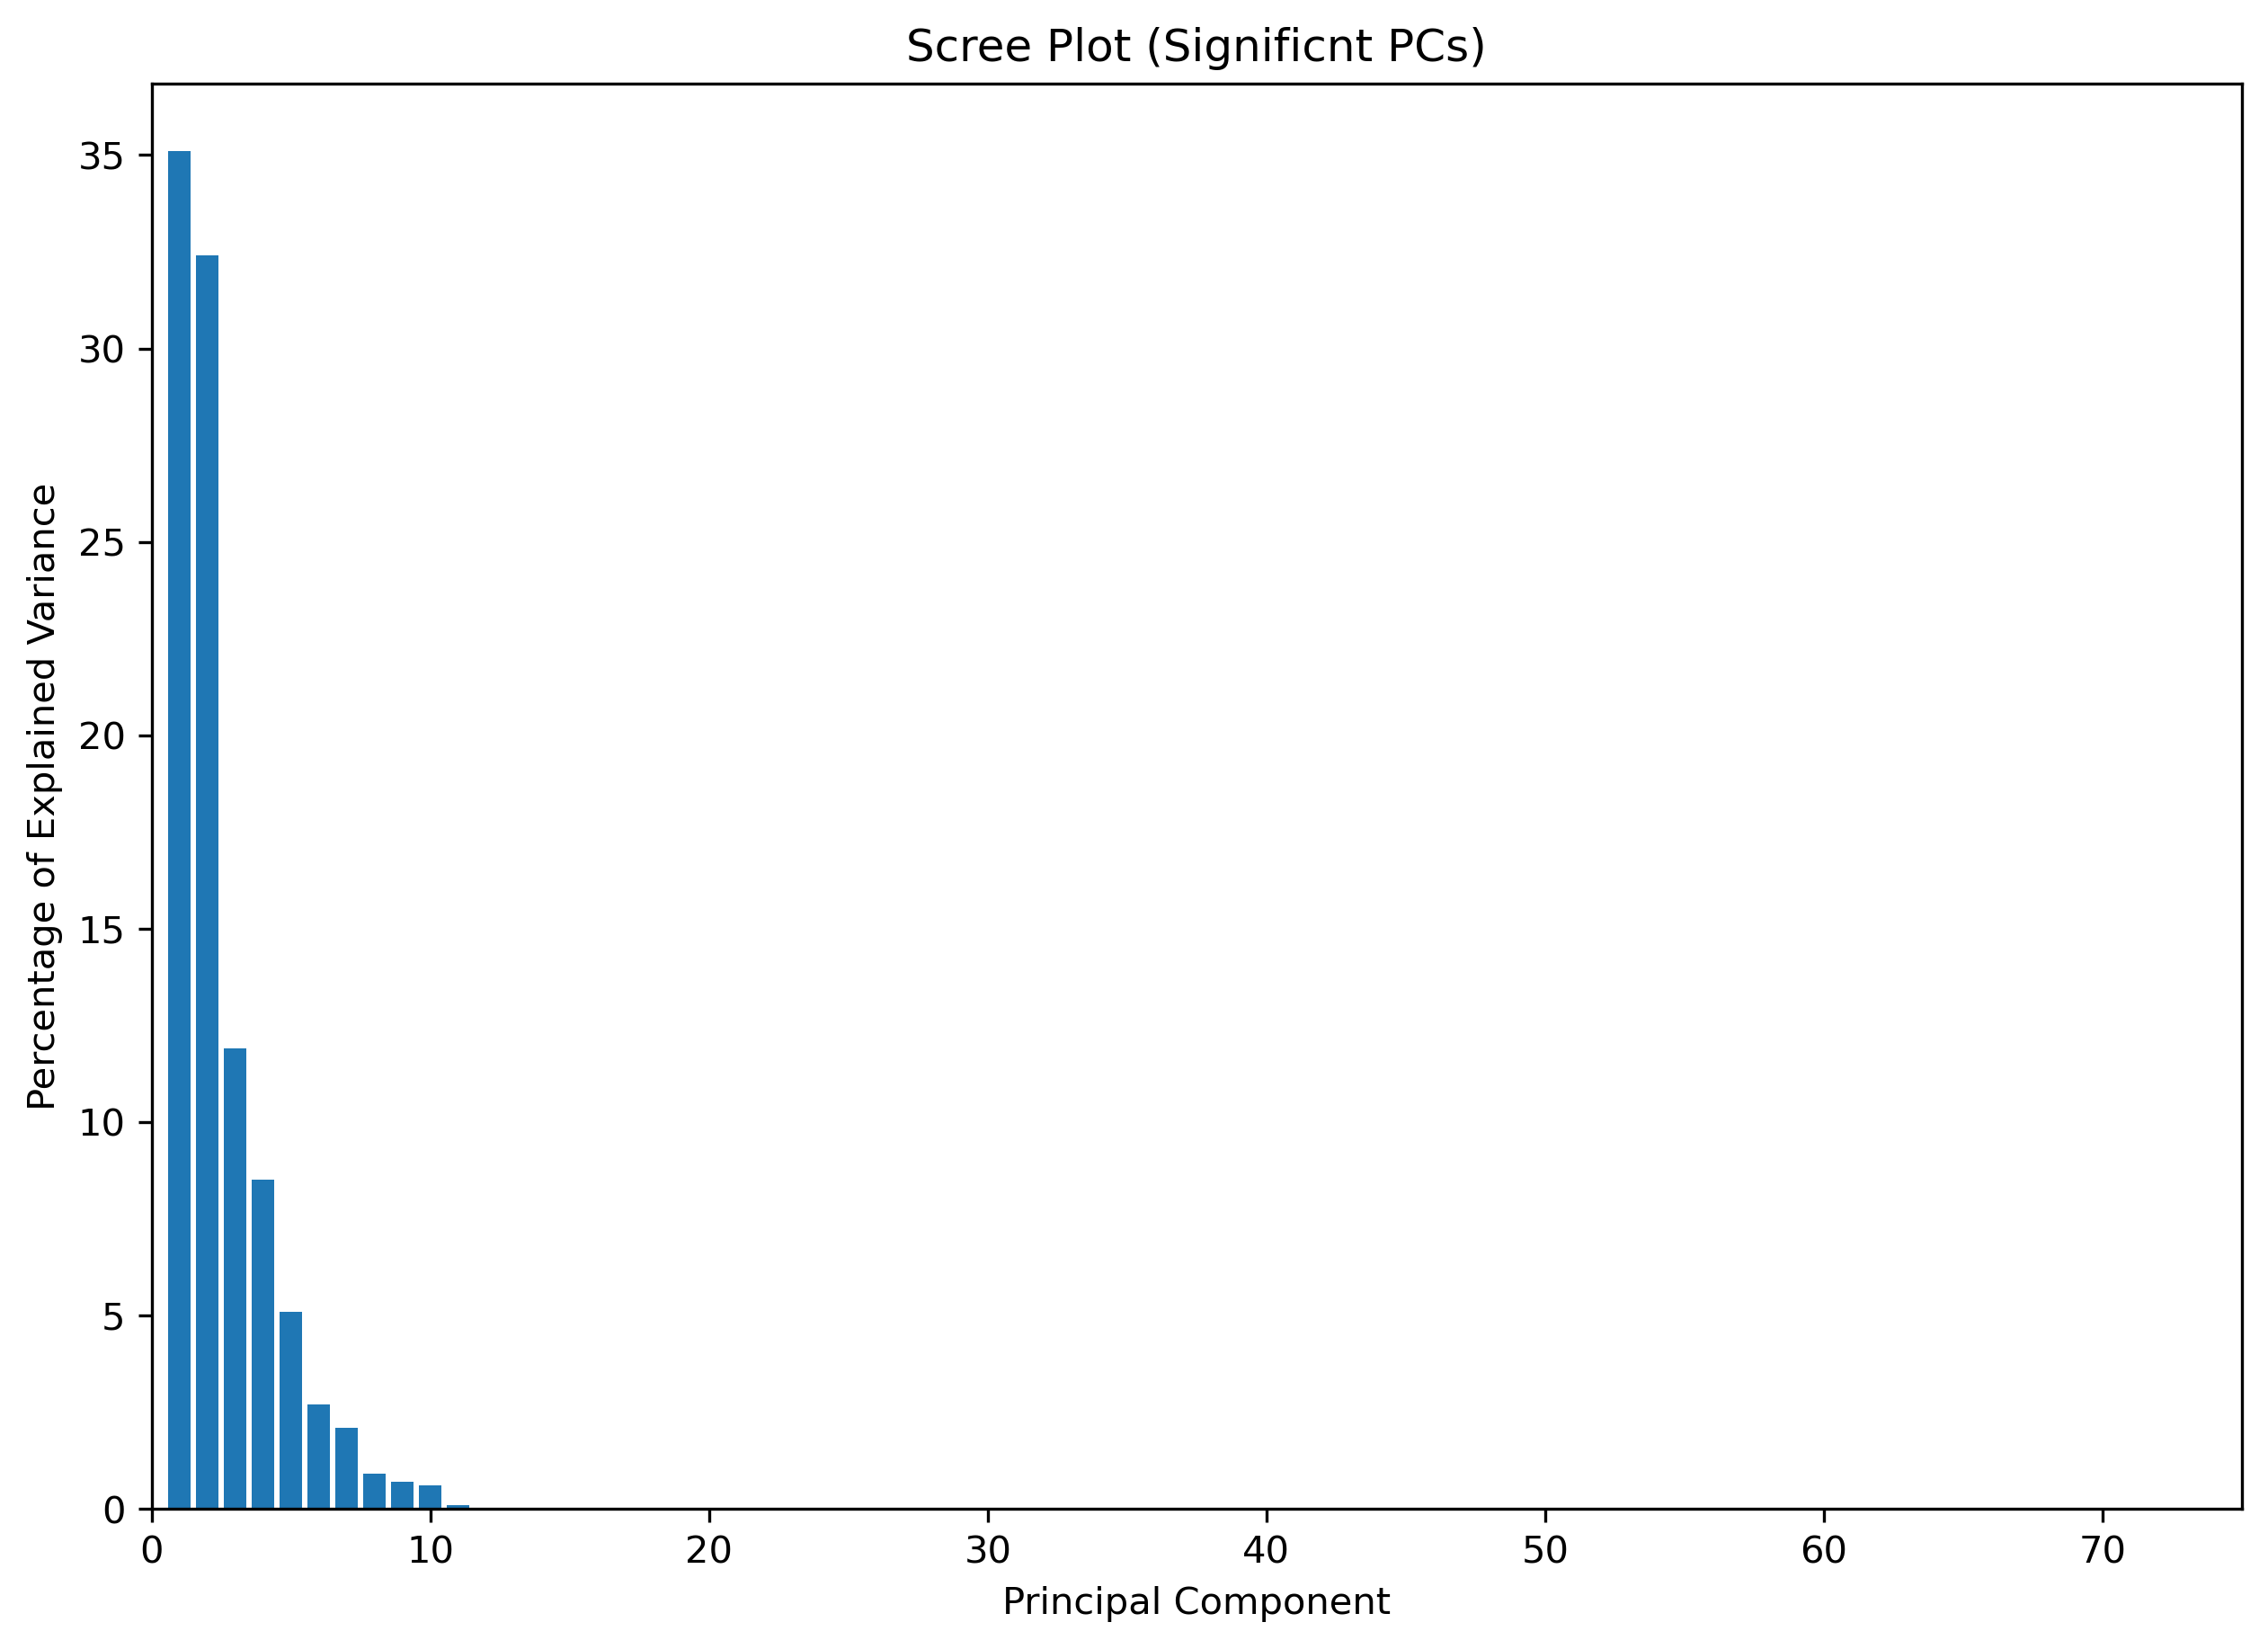

In [5]:
X_standard = StandardScaler().fit_transform(mod_X)
# print(X_standard[0])

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_standard)

secondaryDf['PC1']=principalComponents[:,0]
secondaryDf['PC2']=principalComponents[:,1]

print('Cells, PCs', principalComponents.shape)

print('singular_values_:', pca.singular_values_)
print('explained_variance:', pca.explained_variance_)
print('components:', pca.components_)

fig = plt.figure(figsize=(10,7),dpi=300);

plt.scatter(pca.components_[0],pca.components_[1]) #, tick_label=PClabels
plt.title('Loading Scores')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline()
plt.axvline()

names = ['area','eccentricity','equiv. dia.','major length','minor length','perimeter',
        'K','P','Ni','Zn',
         'Fe','Cu', 'BFY']

for i, txt in enumerate(names):
    plt.annotate(txt, (pca.components_[0][i], pca.components_[1][i]), rotation=60, size=10)

plt.scatter(0,0)
plt.show()

#scree plot

high_pca = PCA(n_components=12)
high_pca.fit_transform(X_standard)

#calculate percentage of variation in each principal components
per_var=np.round(high_pca.explained_variance_ratio_*100, decimals=1)
PClabels =['PC' + str(x) for x in range(1,len(per_var)+1)]

fig = plt.figure(figsize=(10,7),dpi=300);
plt.bar(x=range(1, len(per_var)+1),height=per_var) #, tick_label=PClabels
plt.title('Scree Plot')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.show()
#zoom in on the important PCs
fig = plt.figure(figsize=(10,7),dpi=300);
plt.bar(x=range(1, len(per_var)+1),height=per_var) #, tick_label=PClabels
plt.title('Scree Plot (Significnt PCs)')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.xlim(0,75)
plt.show()

Text(0, 0.5, 'PC2')

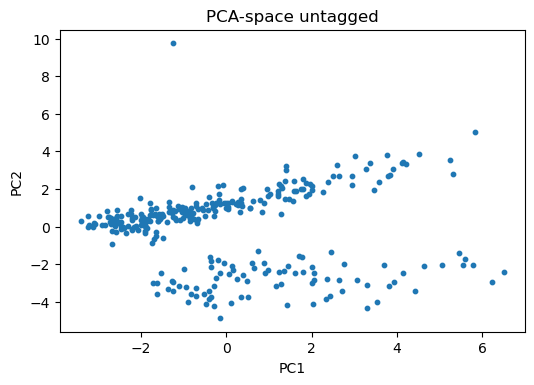

In [6]:
plt.figure(dpi=100)
plt.scatter(secondaryDf['PC1'],secondaryDf['PC2'], s=10)
plt.title('PCA-space untagged')
plt.xlabel('PC1')
plt.ylabel('PC2')

inertia:  1549.5870078785686


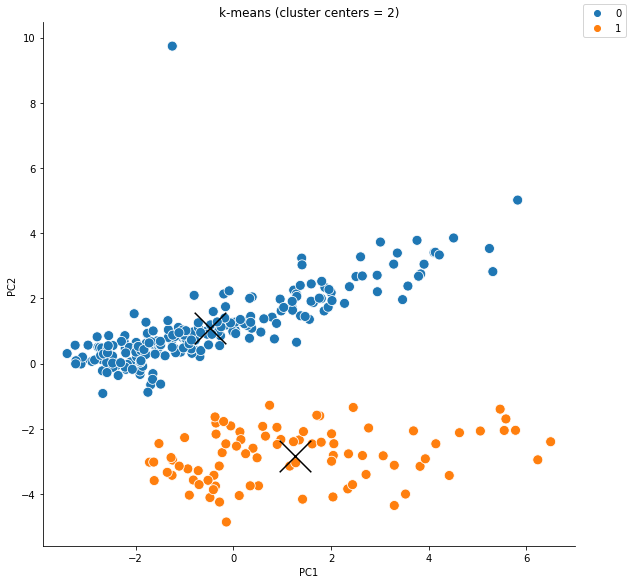

In [7]:
#perform regular sklearn kmeans and plot the cluster centeres

kmeans = KMeans(n_clusters = 2, random_state = 42).fit(secondaryDf[['PC1','PC2']].to_numpy())
inertia=kmeans.inertia_
secondaryDf['Class'] = kmeans.labels_

print('inertia: ', inertia)
pp = sns.pairplot(data=secondaryDf,
                  y_vars=['PC2'],
                  x_vars=['PC1'],
                  kind = 'scatter', 
                 diag_kind='hist', corner = 'True', hue='Class', height=8,plot_kws={"s": 100}
                 )
leg_handles = pp._legend_data.values()
leg_labels = pp._legend_data.keys()
pp.fig.legend(handles=leg_handles, labels=leg_labels, loc='upper right', ncol=1)
pp._legend.remove() # remove existing legend
pp.set(xlabel='PC1',
       ylabel='PC2',
       title='k-means (cluster centers = 2)')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='x',s=1000, facecolors='black')

## fix the indices so they start from zero.
This fix is required since we removed the artifacts

,Pixel_count,area,eccentricity,equivalent_diameter,major_axis_length,minor_axis_length,perimeter,K,P,Ni,...,K_obs_labels,Ni_obs_labels,Fe_obs_labels,Cu_obs_labels,Ca_obs_labels,Zn_obs_labels,PC1,PC2,Class,original index
0,21,1.3125,0.846038,1.292721,1.764861,0.940886,3.828427,0.000045,0.000083,0.000058,...,low,high,high,high,high,high,1.801925,1.994807,0,3
1,17,1.0625,0.945978,1.163107,2.102629,0.681738,2.267767,0.000045,0.000041,0.000055,...,low,high,high,mid,high,high,0.332124,0.777606,0,4
2,23,1.4375,0.579046,1.352879,1.519026,1.238454,3.974874,0.000041,0.000040,0.000043,...,low,high,high,mid,high,high,1.400720,3.234302,0,6
3,14,0.8750,0.829925,1.055502,1.414214,0.788954,2.974874,0.000044,0.000061,0.000061,...,low,low,low,mid,high,high,-0.561536,0.988062,0,9
4,28,1.7500,0.484511,1.492705,1.638394,1.433243,4.474874,0.000041,0.000043,0.000068,...,low,high,high,mid,high,high,3.358255,3.390370,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,17,1.0625,0.885015,1.163107,1.718103,0.799886,3.267767,0.000704,0.000135,0.000034,...,high,low,low,low,low,low,2.440656,-3.713768,1,546
299,17,1.0625,0.919900,1.163107,1.868381,0.732690,3.474874,0.000347,0.000164,0.000034,...,high,low,low,low,low,low,2.717713,-3.401315,1,547
300,25,1.5625,0.941817,1.410474,2.474690,0.831810,5.035534,0.000437,0.000122,0.000056,...,high,low,low,low,low,low,5.579788,-1.697794,1,549
301,11,0.6875,0.819334,0.935603,1.241999,0.712058,2.267767,0.000449,0.000102,0.000034,...,high,low,low,low,low,low,-0.699633,-3.712355,1,551


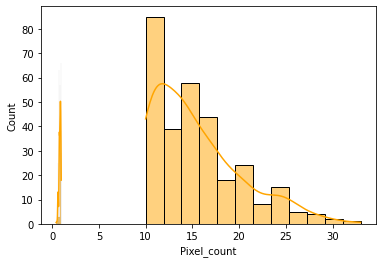

In [8]:
secondaryDf['original index'] = secondaryDf.index.to_numpy()
secondaryDf.reset_index(drop=True, inplace=True)
display(secondaryDf)
sns.histplot(data=secondaryDf, x="Pixel_count", kde=True,color='orange');
sns.histplot(data=secondaryDf, x="eccentricity", kde=True,color='orange');




In [9]:
# Custom condition to view cells (generally set to median of Potassium)
True_list = secondaryDf.loc[
    (secondaryDf['eccentricity'] > 0) &
    (secondaryDf['eccentricity'] <= 0.7)
    
   ].index.tolist()
print( len(True_list) )
# print(True_list)

34


## usign heuristics, tag live and dead cells
In 2018 version copper can be used as a feature. For current version copper should go inside BFY

In [10]:

# now create mult label data frame with strict conditions

labels = [0] * mod_X.shape[0]


secondaryDf['text_labels'] = labels


# (live)
K_threshold=secondaryDf['K'].median() #default is median
KbyP_threshold=secondaryDf['K'].median() #default is median

True_list = secondaryDf.loc[
    (secondaryDf['major_axis_length']>=1) & 
    (secondaryDf['major_axis_length']<= 3) &
    (secondaryDf['minor_axis_length']>=0.5) & 
    (secondaryDf['minor_axis_length']<= 1.5) &
    (secondaryDf['K']>=secondaryDf['K'].median()) &
    (secondaryDf['K']/secondaryDf['P']>=(secondaryDf['K']/secondaryDf['P']).median())
   ].index.tolist()

print('From heuristics, live cell count: ', len(True_list) )

for idx in True_list:
    labels[idx]=1
    
# (Dead)
Ni_threshold=2.04e-05 #default is half of median
NibyP_threshold=0.48 #default is half of median

NibyZn_threshold=0.021 #default is half of median
NibyFe_threshold=0.32 #default is half of median
NibyK_threshold=0.485 #default is half of median
CubyK_threshold=13 #default is half of median

True_list = secondaryDf.loc[
    (secondaryDf['major_axis_length']>=1) & 
    (secondaryDf['major_axis_length']<= 3) &
    (secondaryDf['minor_axis_length']>=0.5) & 
    (secondaryDf['minor_axis_length']<= 1.5) &
    (secondaryDf['Ni']>=0.25*secondaryDf['Ni'].median()) &
    (secondaryDf['Ni']/secondaryDf['P']>= 0.25*(secondaryDf['Ni']/secondaryDf['P']).median()) &
    (secondaryDf['Ni']/secondaryDf['Zn']>= 0.25*(secondaryDf['Ni']/secondaryDf['Zn']).median()) &
    (secondaryDf['Ni']/secondaryDf['Fe']>= 0.25*(secondaryDf['Ni']/secondaryDf['Fe']).median()) &
    (secondaryDf['Ni']/secondaryDf['K']>= 0.25*(secondaryDf['Ni']/secondaryDf['K']).median()) &
    (secondaryDf['Cu']/secondaryDf['K']>= 0.25*(secondaryDf['Cu']/secondaryDf['K']).median())
   ].index.tolist()    
    
print('From heuristics, dead cell count: ', len(True_list) )

for idx in True_list:
    labels[idx]=2 
    
y=labels
    
for idx in range(len(labels)):
    if labels[idx] ==0:
        labels[idx] = 'unassigned'
    if labels[idx] ==1:
        labels[idx] = 'live cells'
    if labels[idx] ==2:
        labels[idx] = 'dead cells'


        
        
secondaryDf['text_labels'] = labels


From heuristics, live cell count:  116
From heuristics, dead cell count:  215


dict_keys(['dead cells', 'live cells'])


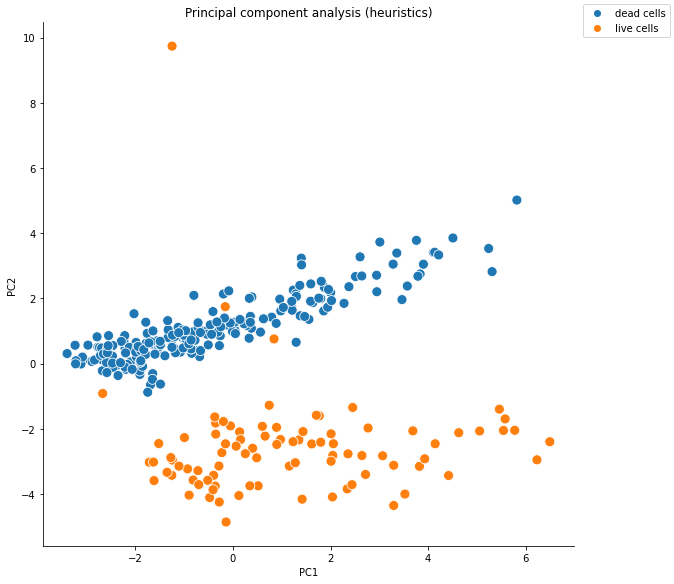

In [11]:
pp = sns.pairplot(data=secondaryDf,
                  y_vars=['PC2'],
                  x_vars=['PC1'],
                  kind = 'scatter', 
                 diag_kind='hist', corner = 'True', hue='text_labels',  height=8,plot_kws={"s": 100}
                 )
leg_handles = pp._legend_data.values()
leg_labels = pp._legend_data.keys()

pp.fig.legend(handles=leg_handles, labels=leg_labels, loc='upper right', ncol=1)
pp._legend.remove() # remove existing legend
print(leg_labels)

pp.set(xlabel='PC1',
       ylabel='PC2',
       title='Principal component analysis (heuristics)')



## use annotations to tag live and dead cells
In 2018 version copper can be used as a feature. For current version copper should go inside BFY

dict_keys(['dead', 'live'])


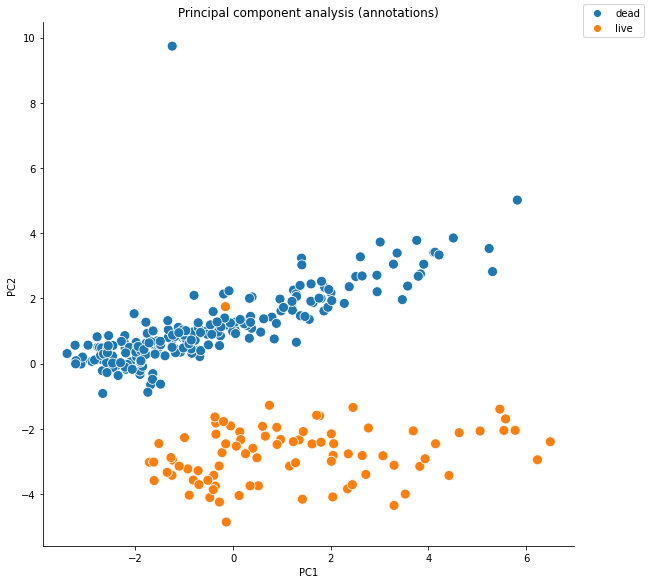

In [12]:
pp = sns.pairplot(data=secondaryDf,
                  y_vars=['PC2'],
                  x_vars=['PC1'],
                  kind = 'scatter', 
                 diag_kind='hist', corner = 'True', hue='KO_label',  height=8,plot_kws={"s": 100}
                 )
leg_handles = pp._legend_data.values()
leg_labels = pp._legend_data.keys()

pp.fig.legend(handles=leg_handles, labels=leg_labels, loc='upper right', ncol=1)
pp._legend.remove() # remove existing legend
print(leg_labels)

pp.set(xlabel='PC1',
       ylabel='PC2',
       title='Principal component analysis (annotations)')



## select datapoints cluster

<IPython.core.display.Javascript object>


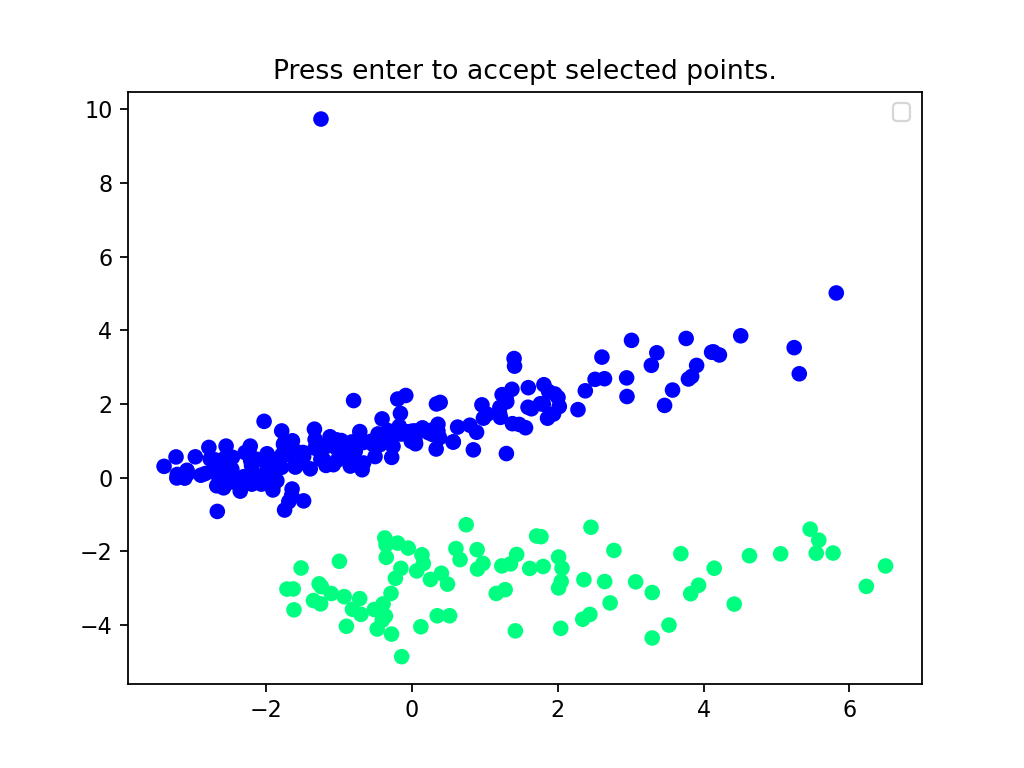

No handles with labels found to put in legend.


In [18]:


%matplotlib notebook





subplot_kw = dict(autoscale_on=True)
fig, ax = plt.subplots(subplot_kw=subplot_kw)

# pts = ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='x',s=1000,c=secondaryDf.Class, facecolors='black')

pts = ax.scatter(secondaryDf['PC1'].to_numpy(),secondaryDf['PC2'].to_numpy(), c=secondaryDf.Class, cmap='winter')

ax.legend()
selector = SelectFromCollection(ax, pts)



fig.canvas.mpl_connect("key_press_event", accept)
ax.set_title("Press enter to accept selected points.")

plt.show()



In [20]:
#shows selected indices in secondaryDf
selector.ind

array([  1,   2,   3,   5,  11,  13,  15,  22,  23,  25,  27,  28,  29,
        31,  34,  36,  53,  54,  81, 102, 105, 109, 110, 117, 119, 121,
       124, 130, 131, 137, 138, 139, 142, 144, 145, 150, 153, 154, 155,
       165, 168, 169, 170, 171, 172, 173, 179, 182, 184, 186, 187, 190,
       200, 205, 206, 210, 213, 225, 226, 227, 229, 230, 233, 234, 236,
       239, 241, 257, 258])

In [22]:
#conversions to original indices
target_scan_cell_indices = secondaryDf['original index'][selector.ind].to_numpy()

In [23]:
target_scan_cell_indices

array([  4,   6,   9,  13,  21,  25,  27,  43,  44,  47,  50,  53,  54,
        58,  61,  66, 106, 107, 159, 201, 206, 210, 211, 224, 227, 231,
       234, 243, 244, 261, 262, 264, 269, 275, 276, 283, 288, 290, 291,
       308, 314, 318, 319, 320, 326, 327, 337, 342, 347, 349, 353, 357,
       374, 380, 382, 389, 398, 419, 421, 422, 424, 425, 431, 432, 435,
       438, 445, 480, 481])